In [1]:
"""
Simulación de la evolución de la agresividad
Versión 1.1 = Añadida función purgar
Autor: Manuel Lopez-Amo
Fecha: 23/09/2019
Programa que simula la evolución de las poblaciones de un ecosistema con halcones y pingüinitas a lo largo de unos dias determinados.
Cada bloque de comida aloja a 2 pájaros, lo que les fuerza a interaccionar si van al mismo bloque.
Inspirado en un video de Youtube que me acabo de ver

"""
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(10)
#función que inserta los pajaros en la matriz
def matrizpajaro(matrix,numero,tipo,disp): 
    #print(disp)
    for i in range(numero):
        #if disp.size==0:
         #   return matrix,disp
        eleccion=np.random.choice(disp)
        #print("eleccion: ",eleccion)
        
        if matrix[eleccion][0]==0:
            matrix [eleccion][0]=tipo
        else:
            matrix [eleccion][1]=tipo
            remove =np.where(disp==eleccion)
            disp=np.delete(disp,remove)
            #print(disp)
    return matrix,disp

#purga elimina los pajaros sobrantes, si no caben todos en las celdas de comida
def purga(doves,hawks,comida):
    if (doves+hawks)>comida*2:
        uno=(doves/(doves+hawks))*(comida*2)
        dos=(hawks/(doves+hawks))*(comida*2)
        print(uno,doves)
        print(dos,hawks)
        doves=int(uno)
        hawks=int(dos)
    return doves,hawks
    

#función que calcula los nuevos pajaros a partir de la matriz
def interaccion(matrix):
    nuevosdoves=0
    nuevoshawks=0
    for x in range(matrix.shape[0]):
    #si un pajaro tiene un bloque de comida para él solo, se reproduce
        if matrix[x][1]==0:
            if matrix[x][0]==1:
                nuevosdoves=nuevosdoves+2
            else:
                if matrix[x][0]==2:
                    nuevoshawks=nuevoshawks+2
        else:
            if matrix[x][0]==1:
                #si dos doves están en el mismo bloque de comida, lo compartirán y sobrevivirán
                if matrix[x][1]==1:
                    nuevosdoves=nuevosdoves+2
                else:
                    #si un dove y un hawk están en el mismo bloque de comida, el dove tiene 1/2 de morir y el hawk 1/2 de reproducirse.
                    if matrix[x][1]==2:
                        chanzavive=np.random.choice([1,2])
                        chanzarep=np.random.choice([1,2])
                        if chanzavive==2:
                            nuevosdoves=nuevosdoves+1
                        if chanzarep==1:
                            nuevoshawks=nuevoshawks+1
                        else:
                            nuevoshawks=nuevoshawks+2
            if matrix[x][0]==2:
                if matrix[x][1]==2:
                    #si 2 hawks comparten comida, combatirán y morirán
                   nuevoshawks=nuevoshawks
                else:
                    #si un dove y un hawk están en el mismo bloque de comida, el dove tiene 1/2 de morir y el hawk 1/2 de reproducirse.
                    if matrix[x][1]==1:
                        chanzavive=np.random.randint(1,2)
                        chanzarep=(1,2)
                        if chanzavive==2:
                            nuevosdoves=nuevosdoves+1
                        if chanzarep==1:
                            nuevoshawks=nuevoshawks+1
                        else:
                            nuevoshawks=nuevoshawks+2
        #print(nuevosdoves,nuevoshawks)
    return nuevosdoves,nuevoshawks


Ahora ejecutamos esto:

Cuantos bloques de comida quieres? :80
cuantos doves habrá en la primera iteración? :40
cuantos hawks habrá en la primera iteración? :40
Numero de iteraciones chikibeibi :200


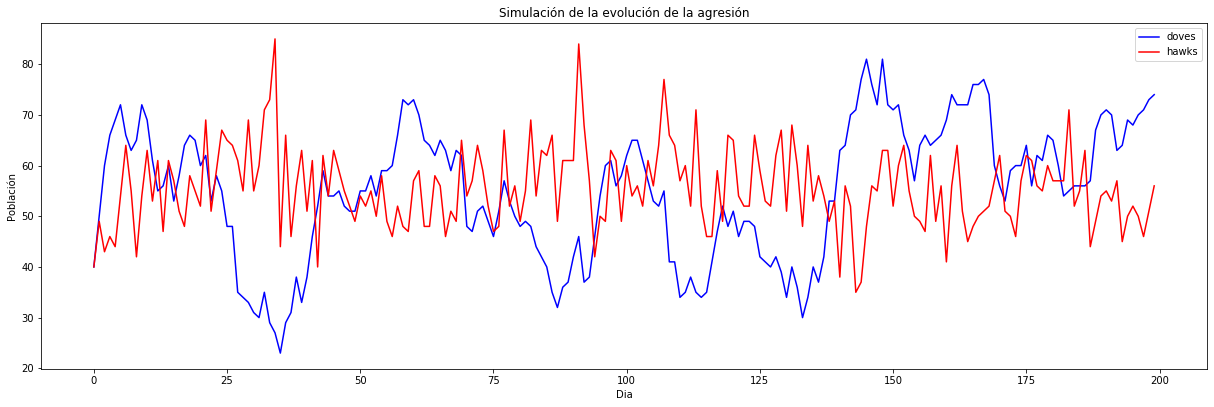

In [28]:
comida=int(input("Cuantos bloques de comida quieres? :"))
doves=int(input("cuantos doves habrá en la primera iteración? :")) 
hawks=int(input("cuantos hawks habrá en la primera iteración? :")) 
itmax=int(input("Numero de iteraciones chikibeibi :"))
#Los doves se representarán como unos en la matriz, y los hawks como doses.
#Cada bloque de comida tiene espacio para 2 aves. 
itlist=[] 
doveslist=[] 
hawkslist=[] 
#print("doves: ",doves)
#print("hawks: ",hawks)
for i in range(itmax):
    itlist.append(i)
    doveslist.append(doves)
    hawkslist.append(hawks)
    matrix=np.zeros((comida,2))
    disp=np.arange(0,comida)
    doves,hawks=purga(doves,hawks,comida)
    matrix,disp=matrizpajaro(matrix,doves,1,disp) 
    #print(matrix)
    matrix,disp=matrizpajaro(matrix,hawks,2,disp) 
    #print(matrix)
    nuevosdoves,nuevoshawks=interaccion(matrix)   
    #print(matrix)
    doves=nuevosdoves
    hawks=nuevoshawks
if len(itlist)<50:
    print(itlist) 
    print(doveslist) 
    print(hawkslist)
fig = plt.figure() 
axes2 = fig.add_axes([0.2, 0.1, 0.7+itmax*0.01, 1.2]) 
axes2.set_xlabel('Dia') 
axes2.set_ylabel('Población') 
axes2.set_title('Simulación de la evolución de la agresión') 
axes2.plot(itlist,doveslist,'b') 
axes2.plot(itlist,hawkslist,'r')
axes2.legend(('doves', 'hawks'))